In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df1 = pd.read_csv("loan.csv")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
###Data understanding
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [24]:
df1.shape

(39717, 111)

In [10]:
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [82]:
df1.info()
#df1.annual_inc.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39319 entries, 0 to 39716
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              39319 non-null  int64         
 1   loan_amnt                       39319 non-null  int64         
 2   funded_amnt                     39319 non-null  int64         
 3   funded_amnt_inv                 39319 non-null  float64       
 4   term                            39319 non-null  object        
 5   int_rate                        39319 non-null  object        
 6   installment                     39319 non-null  float64       
 7   grade                           39319 non-null  object        
 8   sub_grade                       39319 non-null  object        
 9   emp_length                      39319 non-null  object        
 10  home_ownership                  39319 non-null  object        
 11  a

In [11]:
#### Data Cleaning
# missing value imputation, outlier treatment and other kinds of data redundancies, etc.

In [80]:
duplicate = df1[(df1.duplicated())]
duplicate

# removing income outlier because it has most of the "0" entry
df1 = df1[df1["annual_inc"] < df1["annual_inc"].quantile(0.99)]
df1.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [20]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [35]:
#### Remove extra columns mostly have null values,we ony needs amount data for analysis
remove_colums_list = ["desc","mths_since_last_delinq","member_id","url","emp_title","zip_code","tax_liens","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim","mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit",]
df1.drop(labels = remove_colums_list, axis =1, inplace=True)
df1.shape

(39717, 98)

In [37]:
# make it calculatable value
# fill all null values
cols = ["num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
for col in cols: 
    if col in df1:
        df1[col].fillna(0,inplace=True)
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_il_high_credit_limit
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df1.emp_length.fillna('0',inplace=True)
df1.emp_length=df1.emp_length.str.extract('(\d+)')
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_il_high_credit_limit
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#### Making Values calculatable

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [40]:
df1.int_rate = df1.int_rate.str.rstrip('%')
df1.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [41]:
df1.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [47]:
#### Manipulation of strings and dates is done correctly wherever required.
df1.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [51]:
df1.issue_d = pd.to_datetime(df1.issue_d,format ='%b-%y')

In [52]:
# we only have month and year
df1['year']=df1.issue_d.dt.year
df1['month']=df1.issue_d.dt.month
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_il_high_credit_limit,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,12


In [53]:
#### Univariate Analysis 
#we have maily two or three attributes to do univariant analysis

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

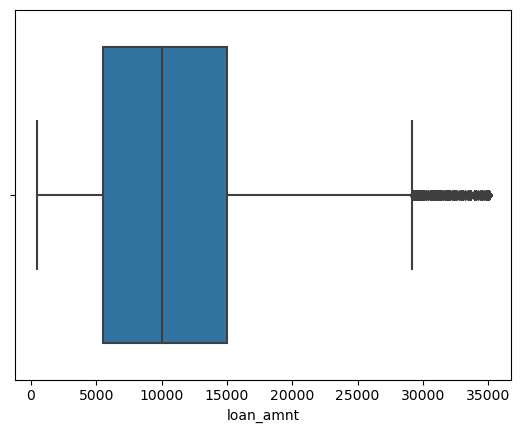

In [58]:
sns.boxplot(df1['loan_amnt'])

In [59]:
df1.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

In [61]:
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='total_pymnt'>

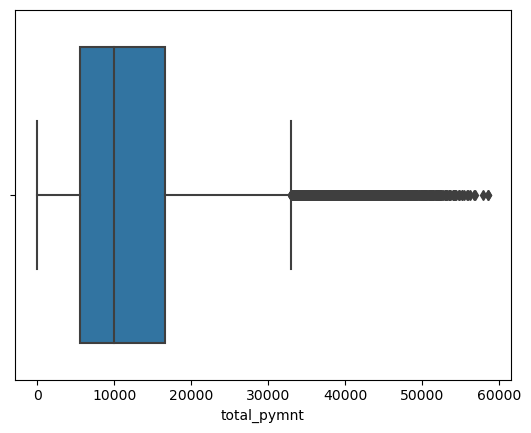

In [62]:
sns.boxplot(df1.total_pymnt)

In [63]:
#### describes loan amnt Vs Month

In [64]:
data_by_month = df1.groupby(by=["month"]).mean()
data_by_month

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_il_high_credit_limit,year
month,,,,,,,,,,,,,,,,,,,,,
1,546252.315259,10656.399748,10645.481295,9550.752657,329.380559,69820.722543,12.899525,0.145439,0.919714,9.238756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044264,0.0,2010.335855
2,555706.472010,10767.790500,10763.973707,9805.982818,330.158181,66792.365123,13.391531,0.142070,0.883800,9.396522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048380,0.0,2010.292197
3,572023.847325,10954.225483,10940.304606,9994.135247,330.901712,67826.396995,13.192017,0.153418,0.818722,9.223254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045790,0.0,2010.258172
4,602867.029993,10731.686662,10547.441778,9945.353347,317.206341,65758.933631,13.170963,0.151023,0.833804,9.122089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049400,0.0,2010.339450
5,630944.062021,10846.607202,10365.438479,9797.210305,307.142881,69014.292051,13.322094,0.160053,0.819940,9.325108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048048,0.0,2010.409470
6,652005.435499,10632.090576,10027.432144,9571.902766,292.920985,69682.727011,13.224300,0.146691,0.860018,9.342177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050031,0.0,2010.407441
7,666034.367664,10540.268987,10193.397583,9603.848264,300.598587,67662.352526,13.288081,0.163406,0.827100,9.292865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044980,0.0,2010.356732
8,691824.408471,11054.270893,10940.932348,10563.693952,320.252899,68473.450441,13.354639,0.155770,0.872086,9.264070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041320,0.0,2010.363559
9,726684.535636,11487.602796,11183.696546,10991.858030,324.890924,71358.007988,13.265770,0.138706,0.899671,9.449836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048236,0.0,2010.410088


In [66]:
data_by_amnt = df1.groupby(by=["loan_amnt"])["funded_amnt"].mean()
data_by_amnt

loan_amnt
500        500.000000
700        700.000000
725        725.000000
750        750.000000
800        800.000000
             ...     
34475    32860.000000
34525    34525.000000
34675    34675.000000
34800    30225.000000
35000    33006.001473
Name: funded_amnt, Length: 885, dtype: float64

<AxesSubplot:xlabel='funded_amnt', ylabel='loan_amnt'>

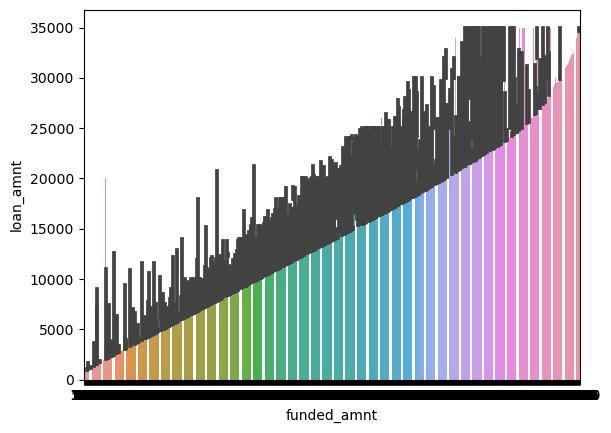

In [83]:
#sns.barplot(data =df1,x="funded_amnt",y="loan_amnt")

In [75]:
#### showing there are the outliers in both loan amount and total payments

In [90]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',

In [91]:
(df1.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.934459
Charged Off    14.201785
Current         2.863755
Name: loan_status, dtype: float64

In [98]:
#columns having some non numeric values

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
df1[cols1] = df1[cols1].apply(pd.to_numeric)

In [93]:
(df1.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.934459
Charged Off    14.201785
Current         2.863755
Name: loan_status, dtype: float64

In [101]:
df1 = df1[df1["funded_amnt"] < df1["funded_amnt"].quantile(0.99)]
df1.loan_amnt.describe()

count    38261.000000
mean     10524.170827
std       6476.138415
min        500.000000
25%       5100.000000
50%       9600.000000
75%      15000.000000
max      34800.000000
Name: loan_amnt, dtype: float64

In [109]:
df1 = df1[df1["loan_amnt"] < df1["loan_amnt"].quantile(0.99)]
dfnew = df1[df1["loan_amnt"] < df1["loan_amnt"].quantile(1)]
df1.loan_amnt.describe()

count    35832.000000
mean      9521.687319
std       5366.259524
min        500.000000
25%       5000.000000
50%       8650.000000
75%      13000.000000
max      23975.000000
Name: loan_amnt, dtype: float64

In [116]:
percent_missing = df1.isnull().sum() * 100 / len(df1) 
missing_value_df = pd.DataFrame({'column_name': df1.columns, 'percent_missing': percent_missing})
missing_value_df
#[max(missing_value_df)]

,column_name,percent_missing
id,id,0.000000
loan_amnt,loan_amnt,0.000000
funded_amnt,funded_amnt,0.000000
funded_amnt_inv,funded_amnt_inv,0.000000
term,term,0.000000
...,...,...
percent_bc_gt_75,percent_bc_gt_75,0.000000
pub_rec_bankruptcies,pub_rec_bankruptcies,1.814021
total_il_high_credit_limit,total_il_high_credit_limit,0.000000
year,year,0.000000


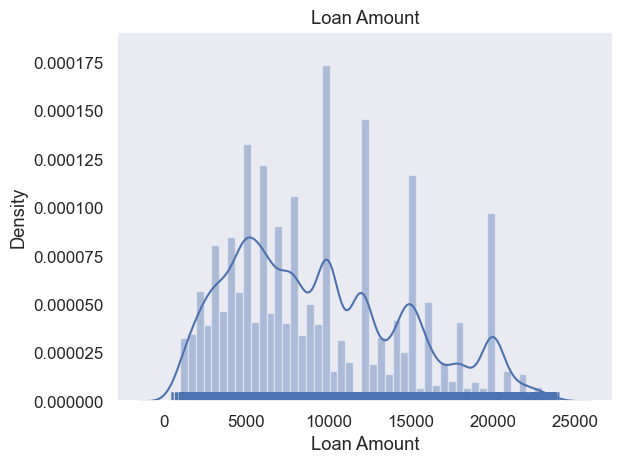

In [132]:
loan = df1
sns.set_style("dark")
# loan_amnt analysis
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount')
ax.set_xlabel('Loan Amount')
plt.show()

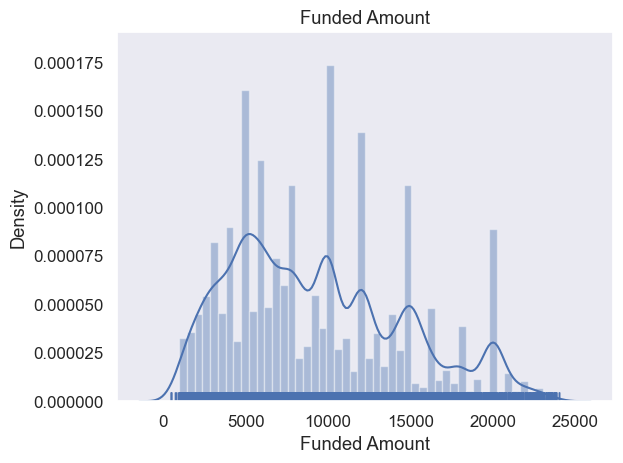

In [131]:
# funded_amnt analysis
ax = sns.distplot(df1['funded_amnt'],rug = True)
ax.set_title('Funded Amount')
ax.set_xlabel('Funded Amount')
plt.show()

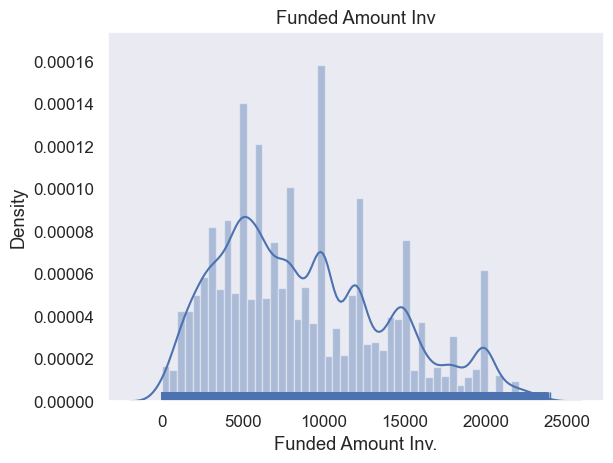

In [134]:
# funded_amnt_inv analysis
ax = sns.distplot(df1['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv')
ax.set_xlabel('Funded Amount Inv.')
plt.show()

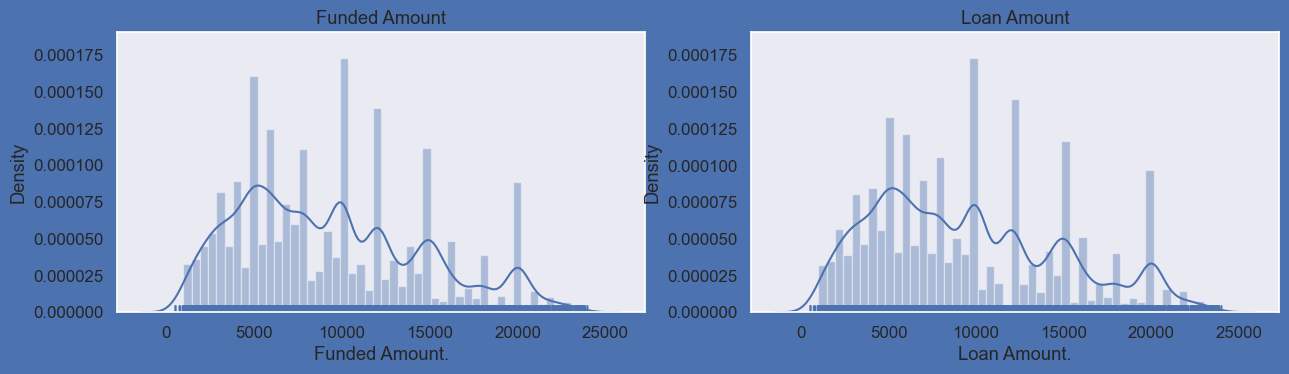

In [138]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
plt.subplot(2,2,1)


ax = sns.distplot(df1['funded_amnt'],rug = True)
ax.set_title('Funded Amount')
ax.set_xlabel('Funded Amount.')
plt.subplot(2,2,2)

ax = sns.distplot(df1['loan_amnt'],rug = True)
ax.set_title('Loan Amount')
ax.set_xlabel('Loan Amount.')
plt.show()

In [139]:
#Univariant analysis of income

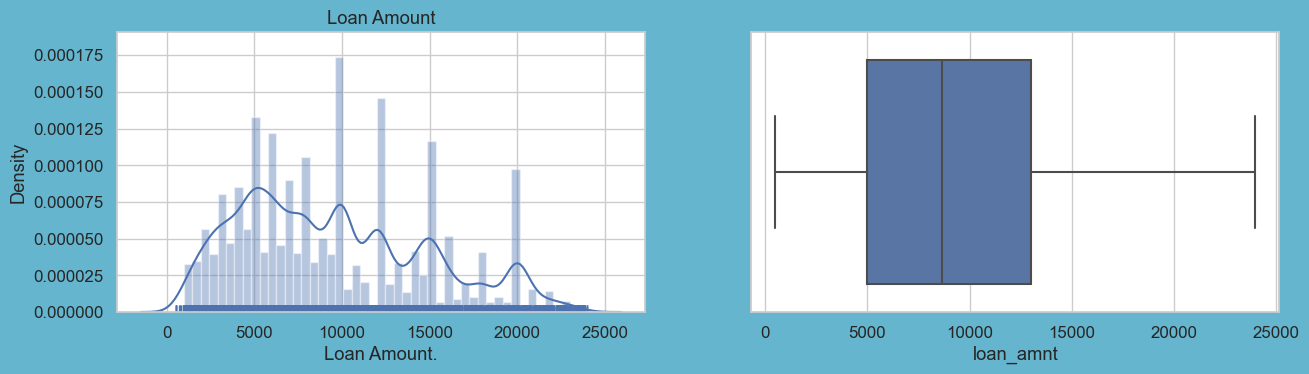

In [144]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")
plt.subplot(2,2,1)

ax = sns.distplot(df1['loan_amnt'],rug = True)
ax.set_title('Loan Amount')
ax.set_xlabel('Loan Amount.')
plt.subplot(2,2,2)

sns.boxplot(df1['loan_amnt'])
plt.show()

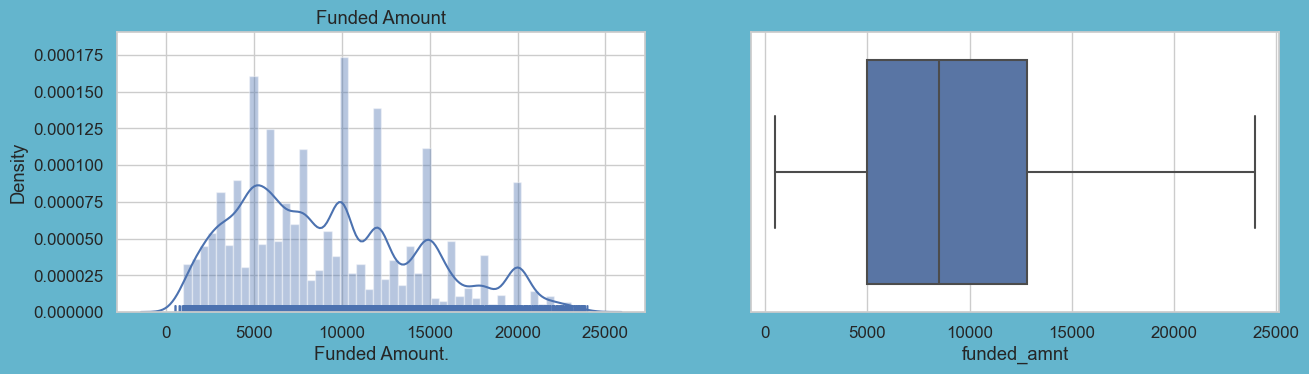

In [146]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")
plt.subplot(2,2,1)

ax = sns.distplot(df1['funded_amnt'],rug = True)
ax.set_title('Funded Amount')
ax.set_xlabel('Funded Amount.')
plt.subplot(2,2,2)

sns.boxplot(df1['funded_amnt'])
plt.show()

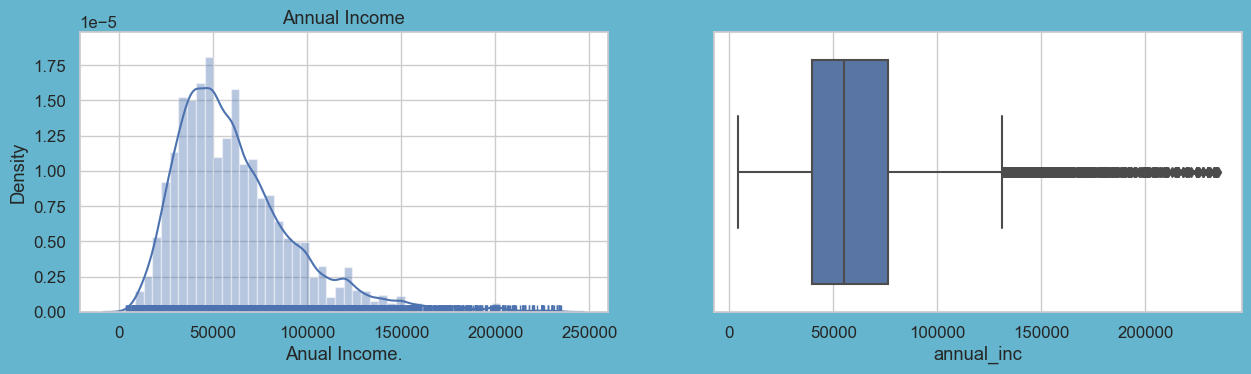

In [151]:
plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")
plt.subplot(2,2,1)

ax = sns.distplot(df1['annual_inc'],rug = True)
ax.set_title('Annual Income')
ax.set_xlabel('Anual Income.')
plt.subplot(2,2,2)
sns.boxplot(df1['annual_inc'])
plt.show()

In [153]:
# anlysis of Loan status

In [154]:
df1.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

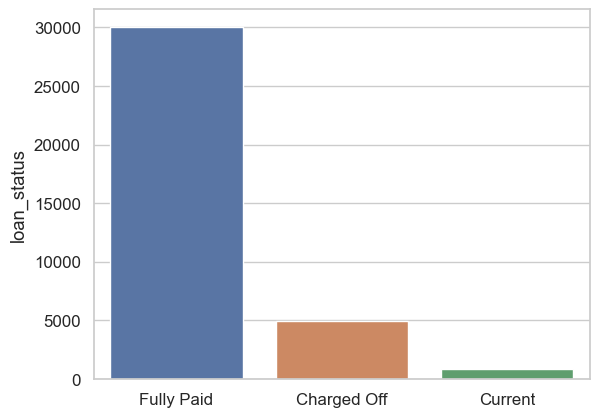

In [176]:
sns.set_style("whitegrid")
sns.barplot(x=df1.loan_status.unique(), y=df1['loan_status'].value_counts())
plt.show()

<AxesSubplot:ylabel='loan_status'>

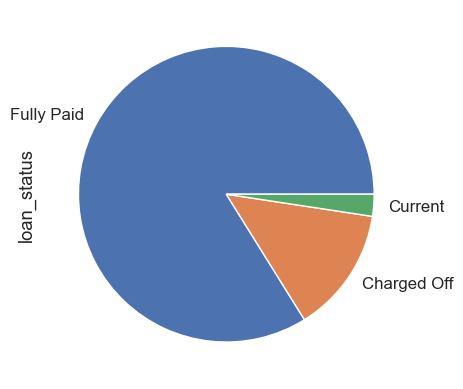

In [166]:
df1['loan_status'].value_counts().plot.pie()

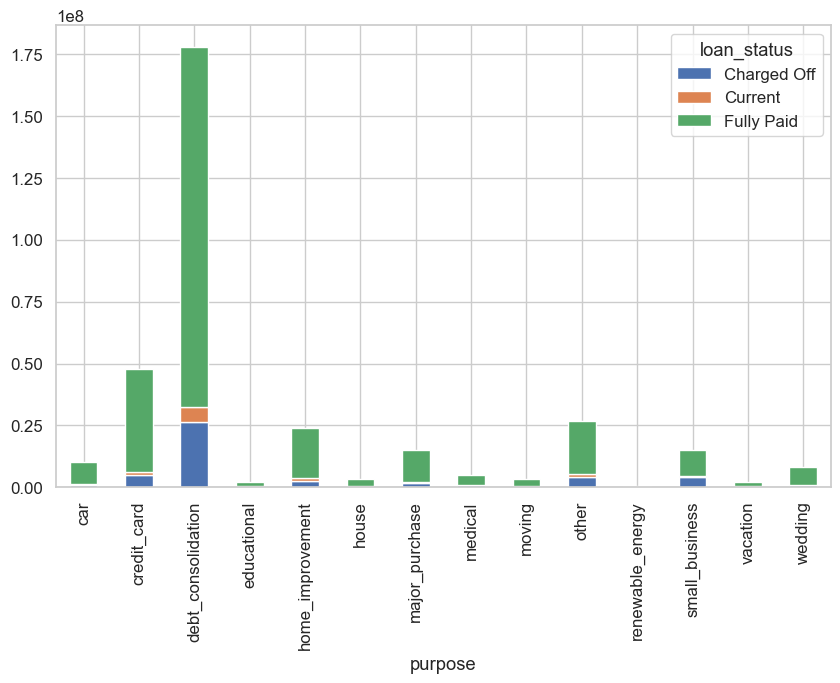

In [182]:
monthly = pd.pivot_table(df1,index="purpose",columns="loan_status",values="loan_amnt",aggfunc=np.sum)
monthly.plot.bar(stacked=True,figsize=(10,6))
plt.show()

In [183]:
#### Loan Applied Vs Paid Back

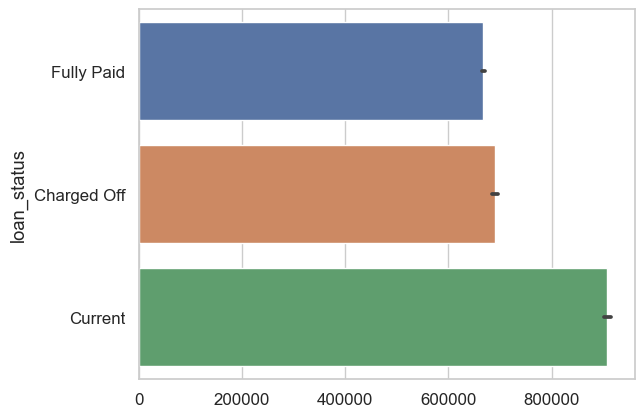

In [185]:
sns.barplot(x=df1["id"].unique(),y=df1['loan_status'])
plt.show()